# Project_1 Boston Airbnb data Analysis

Since 2018, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initivative, the Boston Airbnb Open Dataset can be found in [Kaggle](https://www.kaggle.com/airbnb/boston)

There are 6 steps of **CRISP-DM (Cross-Industry Standard Process for Data Mining):**
+ Business Understanding
+ Data Understanding
+ Data Preparation
+ Modelling
+ Evaluation
+ Deployment

## Business Understanding

Airbnb not only provides one amazing platform for guests who would like travel, make friends and deeply understand the local customs and practicesand, but also provides the same chances for the hosts to rent their properties, rooms in the hosts' house, or share their rooms to the guests. In this project, I am going to use **calendar** and **listings** dataset to answer the following questions:
1. When are the busiest times of the year to visit Boston? And how much do price spike?
2. Does the properties in different regions of Boston have influence on the price? and how are the properties distributed on Boston city?
3. Is there any difference between superhosts and hosts in review rating?
4. What are the features that influence the review points rating?

## Data Understanding

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# load data from csv file
cal_df = pd.read_csv('calendar.csv')
lst_df = pd.read_csv('listings.csv')

Checking the data information

In [3]:
print(f'The calendar dataset has {cal_df.shape[0]} rows and {cal_df.shape[1]} columns')
cal_df.head()

The calendar dataset has 1308890 rows and 4 columns


listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [4]:
print(f'The calendar dataset has {lst_df.shape[0]} rows and {lst_df.shape[1]} columns')
lst_df.head()

The calendar dataset has 3585 rows and 95 columns


id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

Checking the each row is unique

In [5]:
len(lst_df['id'].unique())==lst_df.shape[0]

True

Due to the unique value of lst_df equal to the number of this listing dataset rows, each row represent one unique properties.

## Prepare Data

### Question 1: the busiest time for Boston Airbnb, and the influence on price changing

In [6]:
cal_df.info() # datatype and missing_value information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In order to answer the first question "When are the busiest times of the year to visit Boston? And how much do price spike?". I need to create serval more columns for **calendar** dataset. And the datatype of cal_df *'price'* column is *object*, this column need to transfer into float datatype.

In [7]:
# Transfer the str value into datetime type value and create 'month', 'year' columns
cal_df['month'] = pd.to_datetime(cal_df['date']).dt.month
cal_df['year'] = pd.to_datetime(cal_df['date']).dt.year
cal_df.head()

listing_id        date available price  month  year
0    12147973  2017-09-05         f   NaN      9  2017
1    12147973  2017-09-04         f   NaN      9  2017
2    12147973  2017-09-03         f   NaN      9  2017
3    12147973  2017-09-02         f   NaN      9  2017
4    12147973  2017-09-01         f   NaN      9  2017

From the first 5 rows, 'available' is 'f' and  'price' is NaN. Let's check is there any relationship between those two columns.

In [8]:
cal_df['price'].isnull().sum() == len(cal_df[cal_df['available']=='f'])

True

Due to the above checking, which idicated there is no price, if the room is not available. 
Here I assumed the room has been rent out or occupied. As the result, the room is not available.  
Then if there are less rooms available in the Boston Airbnb platfom, which shows the demand is higher than other period. 

In [9]:
# create the 'occupied' column, if 'available'==f then 'occupied'=0
cal_df['occupied'] = 0
cal_df.loc[(cal_df['available']=='f'),'occupied']=1

In [10]:
# transfer the orginal 'price' column 'object' datatype into 'float' datatype
cal_df['price'] =cal_df['price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x)!= float else x)

In [11]:
# create a new df for calculate the occupied_rate
avg_rate = cal_df.groupby('month')['occupied'].mean().reset_index()
avg_rate['occupied'] = avg_rate['occupied']*100

# create a new df for calculate the avg_price
avg_price = cal_df.groupby('month')['price'].mean().reset_index()

# merge two table 
q1 = pd.merge(avg_rate,avg_price, how='left',on='month')
q1

month   occupied       price
0       1  43.165176  182.799671
1       2  43.420843  180.961028
2       3  50.361621  181.818742
3       4  52.238334  197.252890
4       5  51.783819  193.712295
5       6  50.984384  196.535302
6       7  50.557724  202.486309
7       8  50.019790  203.330142
8       9  68.955196  237.047727
9      10  58.310095  233.416248
10     11  45.261201  202.924416
11     12  45.129806  192.601915

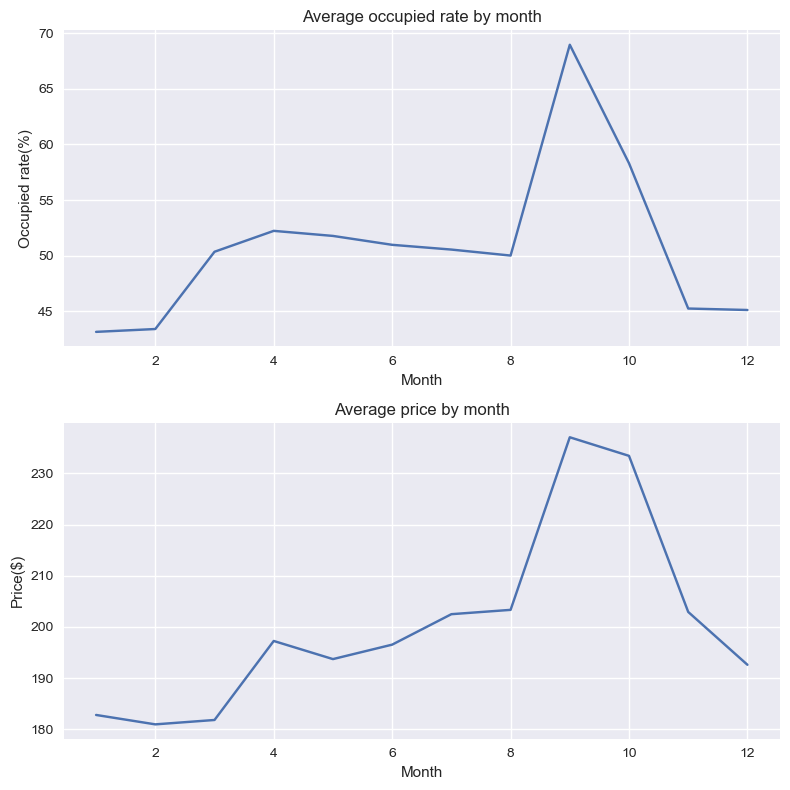

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8), dpi=100)

sns.lineplot(data=q1, x='month', y='occupied', sort=True, ax=ax1)
ax1.set_title('Average occupied rate by month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Occupied rate(%)')

sns.lineplot(data=q1, x='month', y='price', sort=True, ax=ax2)
ax2.set_title('Average price by month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Price($)')

plt.tight_layout()
plt.show();

### Question 2: The crowdest area of Boston Airbnb

For answer this question, I need to figure out the location information in **listing** dataset. Here those ['neighbourhood_cleansed','zipcode','latitude','longitude','property_type'] columns will be used to answer this question.

In [13]:
df_part = lst_df[['neighbourhood_cleansed','zipcode','latitude','longitude','room_type','id']]
df_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   zipcode                 3547 non-null   object 
 2   latitude                3585 non-null   float64
 3   longitude               3585 non-null   float64
 4   room_type               3585 non-null   object 
 5   id                      3585 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 168.2+ KB


In [14]:
# define one function to create sub_dataframe
def create_valcounts(df, feature):
    '''
    this function will build a new dataframe which contain the value_counts result
    of specific column.
    Inputs: df: dataframe contain the information
            feature: the specific column name to do value_counts 
    Outputs: new_df which contain the specific column name value_counts results
    '''
    new_df = df[feature].value_counts()
    new_df = new_df.to_frame().reset_index()
    new_df = new_df.rename({'index':feature, feature:'val_count'}, axis=1)
    return new_df

In [15]:
# q_test = create_valcounts(df_part, 'neighbourhood_cleansed')

In [16]:
q2 = create_valcounts(df_part, 'neighbourhood_cleansed')
q2

neighbourhood_cleansed  val_count
0             Jamaica Plain        343
1                 South End        326
2                  Back Bay        302
3                    Fenway        290
4                Dorchester        269
5                   Allston        260
6               Beacon Hill        194
7                  Brighton        185
8              South Boston        174
9                  Downtown        172
10              East Boston        150
11                  Roxbury        144
12                North End        143
13             Mission Hill        124
14              Charlestown        111
15  South Boston Waterfront         83
16                Chinatown         71
17               Roslindale         56
18                 West End         49
19             West Roxbury         46
20                Hyde Park         31
21                 Mattapan         24
22              Bay Village         24
23    Longwood Medical Area          9
24         Leather District          5

In [23]:
# q2 = df_part['neighbourhood_cleansed'].value_counts()
# q2 = q2.to_frame().reset_index()
# q2 = q2.rename({'index':'zone', 'neighbourhood_cleansed':'val_count'}, axis=1)
# q2

Text(0, 0.5, 'Region')

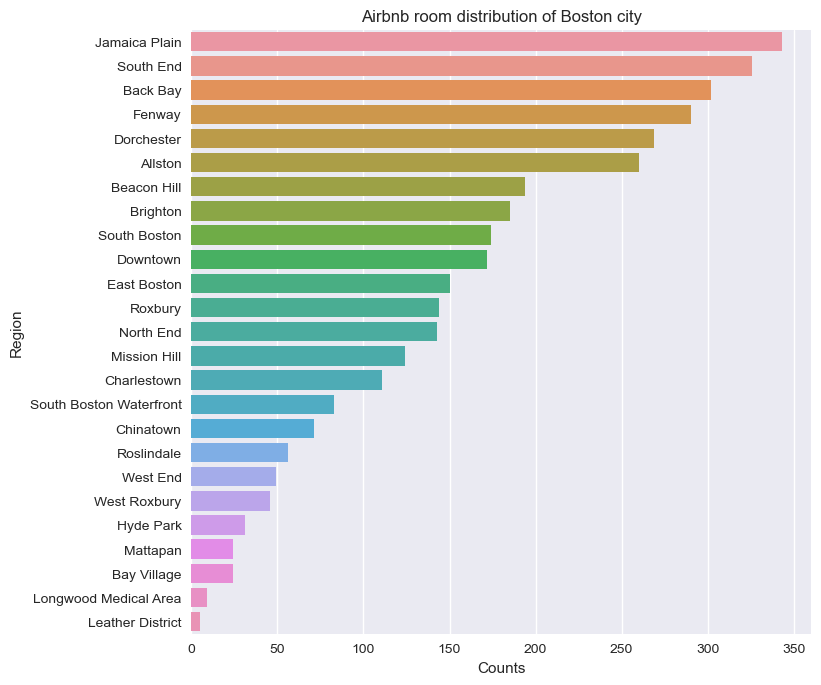

In [17]:
plt.figure(figsize=(8,8), dpi=100)
ax = sns.barplot(data=q2, x='val_count',y='neighbourhood_cleansed')
ax.set_title('Airbnb room distribution of Boston city')
ax.set_xlabel('Counts')
ax.set_ylabel('Region')

**folium** makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. folium supports both Image, Video, GeoJSON and TopoJSON overlays.(https://python-visualization.github.io/folium/)

In [18]:
# indicate region and room_location information by folium library
import folium
from folium import plugins

a = 42.0
b = -71.0
bos_map = folium.Map(location=[a,b],zoom_start=12)

# limit 200
limit = 200
data = lst_df.iloc[:, 39:50]
# instantiate a feature group for the dataframe
incidents = plugins.MarkerCluster().add_to(bos_map)

for lat, lng, label, in zip(data.latitude, data.longitude, data.neighbourhood_cleansed):
    folium.Marker(
        [lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

bos_map.add_child(incidents)

In [19]:
# create heatmap to show the airbnb room distribution
from folium.plugins import HeatMap

# initial a clean copy of the map of Boston
a = 42.0
b = -71.0
bos_map = folium.Map(location=[a,b],zoom_start=12)

# Convert data format
heatdata = lst_df[['latitude', 'longitude']].values.tolist()

# add incidents to map
HeatMap(heatdata).add_to(bos_map)

bos_map

In [20]:
# room_type descriptive value
rm_type = create_valcounts(df_part, 'room_type')
rm_type

room_type  val_count
0  Entire home/apt       2127
1     Private room       1378
2      Shared room         80

In [28]:
# # room_type descriptive value
# rm_type = df_part[['room_type']].value_counts()
# rm_type = rm_type.to_frame().reset_index()
# rm_type = rm_type.rename({0:'val_count'}, axis=1)
# rm_type

Text(0, 0.5, 'Counts')

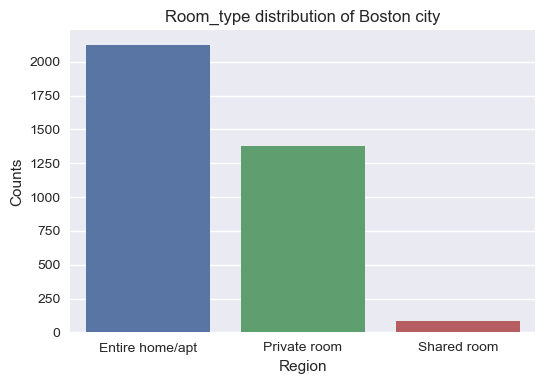

In [21]:
plt.figure(dpi=100)
ax = sns.barplot(data=rm_type, x='room_type', y='val_count')
ax.set_title('Room_type distribution of Boston city')
ax.set_xlabel('Region')
ax.set_ylabel('Counts')

In [22]:
# neighborhood and room_type information
rr_type = df_part[['neighbourhood_cleansed','room_type']].value_counts()
rr_type = rr_type.to_frame().reset_index()
rr_type = rr_type.rename({'neighbourhood_cleansed':'zone', 0:'val_count'}, axis=1)
rr_type.head(10)

zone        room_type  val_count
0       Back Bay  Entire home/apt        263
1      South End  Entire home/apt        250
2         Fenway  Entire home/apt        208
3     Dorchester     Private room        195
4  Jamaica Plain     Private room        181
5  Jamaica Plain  Entire home/apt        157
6        Allston     Private room        156
7    Beacon Hill  Entire home/apt        155
8       Downtown  Entire home/apt        144
9      North End  Entire home/apt        119

### Question 3 The difference between superhosts and hosts

What is superhost?[Airbnb](https://www.airbnb.com/help/article/829/how-to-become-a-superhost?_set_bev_on_new_domain=1644613029_NDM0NmU2MDQxMzBk&locale=en)

To qualify, you must be a primary Host with an account in good standing who has met the following criteria:

+ Completed at least 10 trips or 3 reservations that total at least 100 nights
+ Maintained a 90% response rate or higher
+ Maintained a 1% cancellation rate (1 cancellation per 100 reservations) or lower, with exceptions made for those that fall under our Extenuating Circumstances policy
+ Maintained a 4.8 overall rating (based on the date the guest left a review, not the date they checked out, over the past 365 days)

Based on the above requirements, superhost need to provide superior services. As the result, the super will have more visibility, earning potential, and exclusive rewards.

In [23]:
# choosing information about host
q3 = lst_df[['host_is_superhost','host_response_time','host_response_rate','host_acceptance_rate','review_scores_rating']]
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_is_superhost     3585 non-null   object 
 1   host_response_time    3114 non-null   object 
 2   host_response_rate    3114 non-null   object 
 3   host_acceptance_rate  3114 non-null   object 
 4   review_scores_rating  2772 non-null   float64
dtypes: float64(1), object(4)
memory usage: 140.2+ KB


Text(0, 0.5, 'Counts')

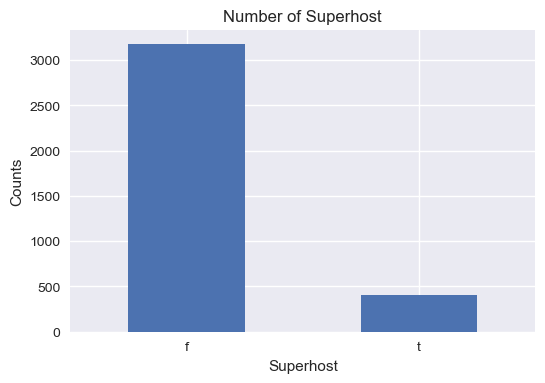

In [24]:
# superhost vs host
plt.figure(dpi=100)
ax = q3['host_is_superhost'].value_counts().plot.bar(rot=0)
ax.set_title('Number of Superhost')
ax.set_xlabel('Superhost')
ax.set_ylabel('Counts')

In [25]:
# superhost vs host in review_score
avg_rating = q3.groupby('host_is_superhost')['review_scores_rating'].mean()
avg_rating = avg_rating.reset_index()
avg_rating

host_is_superhost  review_scores_rating
0                 f             91.061817
1                 t             97.076142

As the above table showing, the superhost own higher review rating.

Text(0, 0.5, 'review scores rating')

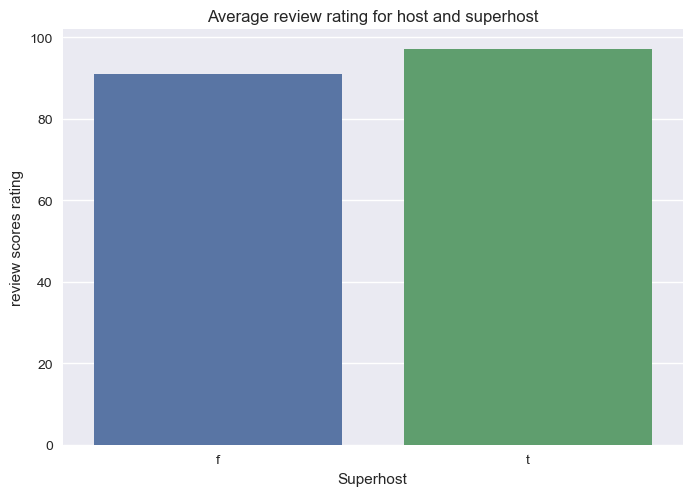

In [26]:
plt.style.use('seaborn')
plt.figure(dpi=100)
ax = sns.barplot(data=avg_rating, x='host_is_superhost', y='review_scores_rating')
ax.set_title('Average review rating for host and superhost')
ax.set_xlabel('Superhost')
ax.set_ylabel('review scores rating')

### Question 4 The model for predict review_score

#### 4.1 What factors have an influence on review_score

In this part, building a model for predicting review_score ['review_scores_rating'] with information:
+ location: ['neighbourhood_cleansed','latitude', 'longitude']
+ host: ['superhost','host_response_time','host_response_rate', 'host_acceptance_rate']
+ room: ['room_type','bathrooms','bedrooms','beds','amenities']
+ price: ['price','cleaning_fee','security_deposit','extra_people']  

In [27]:
# select int, float datatype columns
q4 = lst_df.select_dtypes(include=('int','float'))
q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  0 non-null      float64
 1   latitude                      3585 non-null   float64
 2   longitude                     3585 non-null   float64
 3   bathrooms                     3571 non-null   float64
 4   bedrooms                      3575 non-null   float64
 5   beds                          3576 non-null   float64
 6   square_feet                   56 non-null     float64
 7   has_availability              0 non-null      float64
 8   review_scores_rating          2772 non-null   float64
 9   review_scores_accuracy        2762 non-null   float64
 10  review_scores_cleanliness     2767 non-null   float64
 11  review_scores_checkin         2765 non-null   float64
 12  review_scores_communication   2767 non-null   float64
 13  rev

In [28]:
# drop the columns with more than 80% missing value
q4 = q4.drop(['neighbourhood_group_cleansed','square_feet','has_availability','license','jurisdiction_names'], axis=1)
q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   latitude                     3585 non-null   float64
 1   longitude                    3585 non-null   float64
 2   bathrooms                    3571 non-null   float64
 3   bedrooms                     3575 non-null   float64
 4   beds                         3576 non-null   float64
 5   review_scores_rating         2772 non-null   float64
 6   review_scores_accuracy       2762 non-null   float64
 7   review_scores_cleanliness    2767 non-null   float64
 8   review_scores_checkin        2765 non-null   float64
 9   review_scores_communication  2767 non-null   float64
 10  review_scores_location       2763 non-null   float64
 11  review_scores_value          2764 non-null   float64
 12  reviews_per_month            2829 non-null   float64
dtypes: float64(13)
mem

In [29]:
# fillna with column mode value
for col in ['host_response_time','host_response_rate', 'host_acceptance_rate']:
    q4[col] = lst_df[col].fillna(lst_df[col].mode()[0])
# print(lst_df['host_response_time'].value_counts())
# print(lst_df['host_response_time'].isnull().sum())
# print(q4['host_response_time'].value_counts())
# print(q4['host_response_time'].isnull().sum())

In [30]:
# transfer the str into int datatype
q4['host_response_rate']= q4['host_response_rate'].str[:-1].astype(int)
q4['host_acceptance_rate']= q4['host_acceptance_rate'].str[:-1].astype(int)
# q4.head()

In [31]:
# clearn the columns with price information, get the digital value from the str 
for col in ['price','cleaning_fee','security_deposit','extra_people']:
    q4[col] = lst_df[col].apply(lambda x: float((x[1:].replace(',',''))) if type(x)!= float else x)
    q4[col] = q4[col].fillna(0.0)
# q4.head()

In [32]:
# check how many missing_value 
q4['beds'].isnull().sum()

9

For **bathrooms, bedrooms, beds** columns, there is serval missing value, fillna with median value for this three columns. 

In [33]:
# fillna with median value
for col in ['bathrooms','bedrooms','beds']:
    q4[col].fillna(q4[col].median(), inplace=True)
# q4['beds'].isnull().sum()

In [34]:
# get some describe text information for original dataframe
q4[['superhost','room_type','neighbourhood_cleansed','transit','amenities']] = lst_df[['host_is_superhost','room_type', 'neighbourhood_cleansed','transit','amenities']]
q4.shape

(3585, 25)

In [35]:
# transfer the text information into integer value with get_dummies function
for col in ['host_response_time','superhost','room_type','neighbourhood_cleansed']:
    q4 = pd.concat([q4.drop(col, axis=1), pd.get_dummies(q4[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
# q4.head()

In [36]:
q4.shape

(3585, 51)

In [37]:
q4.head()

latitude  longitude  bathrooms  bedrooms  beds  review_scores_rating  \
0  42.282619 -71.133068        1.5       2.0   3.0                   NaN   
1  42.286241 -71.134374        1.0       1.0   1.0                  94.0   
2  42.292438 -71.135765        1.0       1.0   1.0                  98.0   
3  42.281106 -71.121021        1.0       1.0   2.0                 100.0   
4  42.284512 -71.136258        1.5       1.0   2.0                  99.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     NaN                        NaN                    NaN   
1                    10.0                        9.0                   10.0   
2                    10.0                        9.0                   10.0   
3                    10.0                       10.0                   10.0   
4                    10.0                       10.0                   10.0   

   review_scores_communication  ...  neighbourhood_cleansed_Mattapan  \
0                          NaN  ...                                0   
1                         10.0  ...                                0   
2                         10.0  ...                                0   
3                         10.0  ...                                0   
4                         10.0  ...                                0   

   neighbourhood_cleansed_Mission Hill  neighbourhood_cleansed_North End  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   neighbourhood_cleansed_Roslindale  neighbourhood_cleansed_Roxbury  \
0                                  1                               0   
1                                  1                               0   
2                                  1                               0   
3                                  1                               0   
4                                  1                               0   

   neighbourhood_cleansed_South Boston  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   neighbourhood_cleansed_South Boston Waterfront  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   neighbourhood_cleansed_South End  neighbourhood_cleansed_West End  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

  neighbourhood_cleansed_West Roxbury  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 51 columns]

There are so many factors could influence the final review_score_rating. Like the room location, is it closed to the attractions or easy to access bus/metro, does it provide the necessary amenities? In my work, the 'amenities' columns as the part data information to build the model to predict the review_score_rating.
However, this column provides a lot of text infomation, which cannot be utilized in model directly. I need to transfer those text information into digital version with some NLP steps. I got those tutuition from the online source [Youtube](https://www.youtube.com/user/krishnaik06)

In [38]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
ps=PorterStemmer()
cv = CountVectorizer()

In [39]:
# in order to check the status of the column, I analyzed those two columns separately.
amen_anls = q4['amenities']
amen_anls.head()

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
Name: amenities, dtype: object

In [40]:
corpus = [] # create one empty list
# transfer each element information in 'amenities' into one list
for i in range(len(amen_anls)):
    review = re.sub('[^a-zA-Z]', ' ', amen_anls.iloc[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))] # stemming each word in one series element, except the word in english stopword
    review = ' '.join(review)
    corpus.append(review)

X = cv.fit_transform(corpus).toarray() # transfer the original str list into int matrix with sklearn.feature_extraction.text.CountVectorizer function

In [41]:
# build the dataframe to concat with original q4 dataframe
am_q4 = pd.DataFrame(data=X, index=range(len(corpus)), columns=range(68)) 
am_q4 = am_q4.add_prefix('amenity_')
q4 = pd.concat([q4.drop('amenities', axis=1), am_q4], axis=1)

In [42]:
q4.shape

(3585, 118)

In [43]:
q4.columns[q4.isnull().sum()>0]

Index(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'transit'],
      dtype='object')

In [44]:
q4 = q4.drop(['review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value','transit'], axis=1)

In [45]:
q4 = q4.dropna(subset=['review_scores_rating'])
q4.shape

(2772, 111)

In [46]:
q4.columns[q4.isnull().sum()>0]

Index([], dtype='object')

#### 4.2 The model and the metric

How to build a model:
+ Initial the linear model with nomalized data
+ Fit your model on the training data
+ Predict value by test data
+ Get the metric score on the test data

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [48]:
# split inot explanatory and response variables
X = q4.drop(['review_scores_rating'], axis=1)
y = q4['review_scores_rating']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# for sklearn.LinearRegression model which utilized L2 (ridge) penalty by default
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [50]:
y_pred = lm_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_square = r2_score(y_test, y_pred)
print('For the test data, the error of this linear model is:')
print(f'RMSE: {rmse}')
print(f'r_square error: {r_square}')

For the test data, the error of this linear model is:
RMSE: 8.991388260906689
r_square error: 0.0879154880150127


## Summary
From the above analysis, the September, Octuber two month is the busiest time for Boston Airbnb market. And Jamaica Plain region have the most airbnb hosts in Boston city.
In general, the superhost own higher review_rating value comparing with hosts. And utilizing the information abou location, host, room, price to predict the review score with 0.088 R2_score.